In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn

C:\Users\aczer\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\aczer\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\aczer\AppData\Local\Programs\Python\Python39\

In [2]:
def tuple_to_dict(list_of_tuples):
    dict = {}
    for a, b in list_of_tuples:
        dict[a] = b
    return dict
    
def tuple_to_dict_2(list_of_tuples):
    dict = {}
    for a, b in list_of_tuples:
        dict[b] = a
    return dict

In [3]:
user_matrix = np.load('user_matrix.npy')
item_matrix = np.load('item_matrix.npy')
dict_user = np.load('dict_user.npy')
dict_items = np.load('dict_items.npy')

In [4]:
dict_user_df = pd.DataFrame(dict_user)
dict_user_df = dict_user_df.rename(columns = {0:'user_id',1:'matrix_id'})

dict_movie_df = pd.DataFrame(dict_items)
dict_movie_df = dict_movie_df.rename(columns = {0:'movie_id',1:'matrix_id'})

In [5]:
dict_user_df.head()

user_id  matrix_id
0        1          0
1        2          1
2        3          2
3        4          3
4        5          4

In [6]:
dict_user = tuple_to_dict(dict_user)
dict_items = tuple_to_dict(dict_items)

In [7]:
dict_movie_df

movie_id  matrix_id
0            1          0
1            2          1
2            3          2
3            4          3
4            5          4
...        ...        ...
3670      3948       3670
3671      3949       3671
3672      3950       3672
3673      3951       3673
3674      3952       3674

[3675 rows x 2 columns]

In [8]:
users_df = pd.read_csv('ml-1m/users.dat',
                        delimiter='::', header=None,
                        names=['user_id', 'Gender','Age','Occupation','Zip-Code'], encoding = "ISO-8859-1")

C:\Users\aczer\AppData\Local\Temp\ipykernel_8436\3957394905.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('ml-1m/users.dat',


In [9]:
movies_df = pd.read_csv('ml-1m/movies.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['movie_name', 'genre'], encoding = "ISO-8859-1")
movies_df['movie_id'] = movies_df.index.to_list()

In [65]:
movies_df

movie_name                         genre  \
1                       Toy Story (1995)   Animation|Children's|Comedy   
2                         Jumanji (1995)  Adventure|Children's|Fantasy   
3                Grumpier Old Men (1995)                Comedy|Romance   
4               Waiting to Exhale (1995)                  Comedy|Drama   
5     Father of the Bride Part II (1995)                        Comedy   
...                                  ...                           ...   
3948             Meet the Parents (2000)                        Comedy   
3949          Requiem for a Dream (2000)                         Drama   
3950                    Tigerland (2000)                         Drama   
3951             Two Family House (2000)                         Drama   
3952               Contender, The (2000)                Drama|Thriller   

      movie_id     genre_2    genre_1  genre_3  
1            1  Children's  Animation   Comedy  
2            2  Children's  Adventure  Fantasy  
3            3     Romance     Comedy     None  
4            4       Drama     Comedy     None  
5            5        None     Comedy     None  
...        ...         ...        ...      ...  
3948      3948        None     Comedy     None  
3949      3949        None      Drama     None  
3950      3950        None      Drama     None  
3951      3951        None      Drama     None  
3952      3952    Thriller      Drama     None  

[3883 rows x 6 columns]

In [10]:
# movies_df['genre_2'] = movies_df['genre'].str.split('\|')

In [45]:
new = movies_df['genre'].str.split('\|',expand= True)
movies_df['genre_1'] = new[0]
movies_df['genre_2'] = new[1]
movies_df['genre_3'] = new[2]

In [71]:
new_year = movies_df['movie_name'].str.split('(',expand= True)
# movies_df['genre_1'] = new[0]
movies_df['year'] = new_year[1].str[:4]

In [72]:
movies_df

movie_name                         genre  \
1                       Toy Story (1995)   Animation|Children's|Comedy   
2                         Jumanji (1995)  Adventure|Children's|Fantasy   
3                Grumpier Old Men (1995)                Comedy|Romance   
4               Waiting to Exhale (1995)                  Comedy|Drama   
5     Father of the Bride Part II (1995)                        Comedy   
...                                  ...                           ...   
3948             Meet the Parents (2000)                        Comedy   
3949          Requiem for a Dream (2000)                         Drama   
3950                    Tigerland (2000)                         Drama   
3951             Two Family House (2000)                         Drama   
3952               Contender, The (2000)                Drama|Thriller   

      movie_id     genre_2    genre_1  genre_3  year  
1            1  Children's  Animation   Comedy  1995  
2            2  Children's  Adventure  Fantasy  1995  
3            3     Romance     Comedy     None  1995  
4            4       Drama     Comedy     None  1995  
5            5        None     Comedy     None  1995  
...        ...         ...        ...      ...   ...  
3948      3948        None     Comedy     None  2000  
3949      3949        None      Drama     None  2000  
3950      3950        None      Drama     None  2000  
3951      3951        None      Drama     None  2000  
3952      3952    Thriller      Drama     None  2000  

[3883 rows x 7 columns]

In [76]:
np.unique(movies_df['year'])

array(['1919', '1920', '1921', '1922', '1923', '1925', '1926', '1927',
       '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935',
       '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943',
       '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', 'A Já', 'Abre', 'Ai N', 'Ai n', 'Alic', 'Amig', 'Anat',
       'Andy', 'Angu', 'Anto', 'Apur', 'Auch', 'Azuc', 'Bach', 'Badk',
       'Bamb', 'Bewe', 'Bian', 'Bis ', 'Blau', 'Blec', 'Boca', 'Bron',
       'Brot', 'Bull', 'Bure', "C'es", 'Café', 'Call', 'Cann', 'Caro',
      

In [13]:
def plot_results_users(alg_output, users_df, by, dict_user_df, alg_label ):
    alg_df = pd.DataFrame(alg_output)
    alg_df['matrix_id']= alg_df.index.to_list()
    alg_df = alg_df.merge(dict_user_df, on = 'matrix_id')
    alg_df = alg_df.merge(users_df, on = 'user_id')
    by_list = np.unique(alg_df[by])
    df_list = []
    for param in by_list:
        df_list.append(alg_df.loc[alg_df[by] == param ])
    sc = []
    tmp_id = 0
    plt.figure(figsize=(20,10))
    for i in by_list:
        sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
        tmp_id +=1
    plt.legend(sc,by_list)
    plt.title(alg_label)
    plt.show()

In [77]:
def plot_results_movies(alg_output, movies_df, by, dict_item_df, alg_label ):
    alg_df = pd.DataFrame(alg_output)
    alg_df['matrix_id']= alg_df.index.to_list()
    alg_df = alg_df.merge(dict_item_df, on = 'matrix_id')
    alg_df = alg_df.merge(movies_df, on = 'movie_id')
    by_list = np.unique(alg_df[by])
    # by_list = ['Western', 'Animation', "Children's",
    #    'Crime', 'Documentary', 'Fantasy', 'Horror',
    #    'Musical', 'Mystery', 'Romance', 'Sci-Fi']

    by_list=['1919', '1920', '1921', '1922', '1923', '1925', '1926', '1927',
       '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935',
       '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943',
       '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000']
    df_list = []
    t = 0
    for param in by_list:
        # if t>= 10:
        #     break;
        df_list.append(alg_df.loc[alg_df[by] == param ])
        t+=1
    sc = []
    tmp_id = 0
    plt.figure(figsize=(20,10))
    # plt.style.use('ggplot')
    # plt.rcParams['image.cmap'] = 'jet'
    t = 0
    for i in by_list:
        # if t>= 10:
            # break;
        sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
        tmp_id +=1
        # t+=1
    plt.legend(sc,by_list)
    # plt
    plt.title(alg_label)
    plt.show()

In [254]:
# def plot_results_movies_gr(alg_output, movies_df, dict_item_df, alg_label ):
#     alg_df = pd.DataFrame(alg_output)
#     alg_df['matrix_id']= alg_df.index.to_list()
#     alg_df = alg_df.merge(dict_item_df, on = 'matrix_id')
#     alg_df = alg_df.merge(movies_df, on = 'movie_id')
#     by_list = np.unique(alg_df[''])
#     df_list = []
#     for param in by_list:
#         df_list.append(alg_df.loc[alg_df[by] == param ])
#     sc = []
#     tmp_id = 0
#     plt.figure(figsize=(20,10))
#     for i in by_list:
#         sc.append(plt.scatter(df_list[tmp_id][0],df_list[tmp_id][1], label = i))
#         tmp_id +=1
#     # plt.legend(sc,by_list)
#     plt
#     plt.title(alg_label)
#     plt.show()

In [61]:
pca = PCA(n_components = 2)
pca_out = pca.fit_transform(item_matrix)

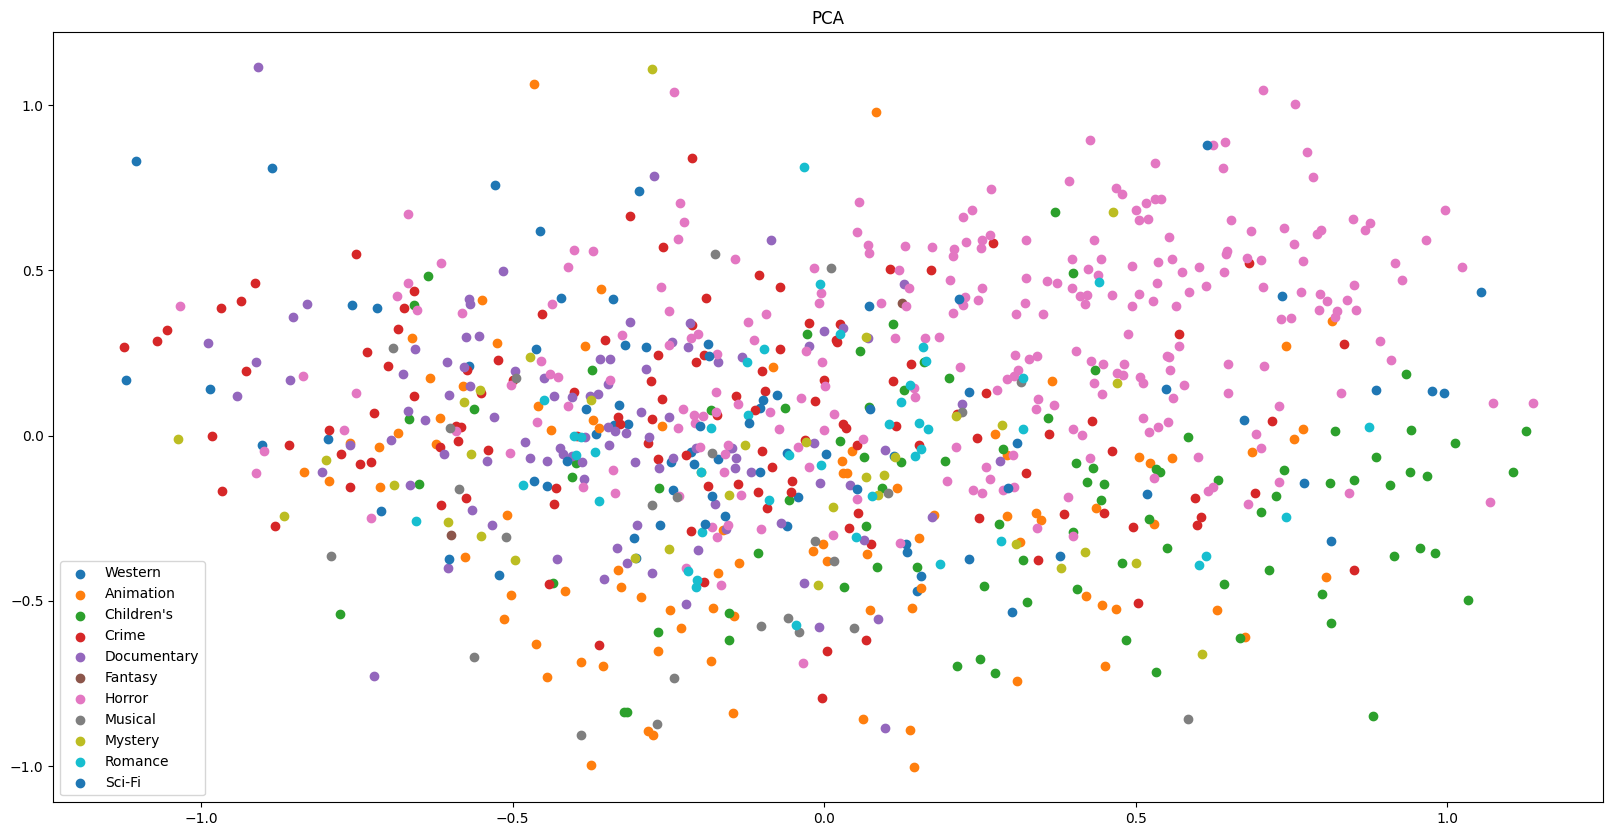

In [62]:
plot_results_movies(pca_out,movies_df,'genre_1',dict_movie_df,'PCA')

In [257]:
pca = PCA(n_components = 2)
pca_out = pca.fit_transform(user_matrix)

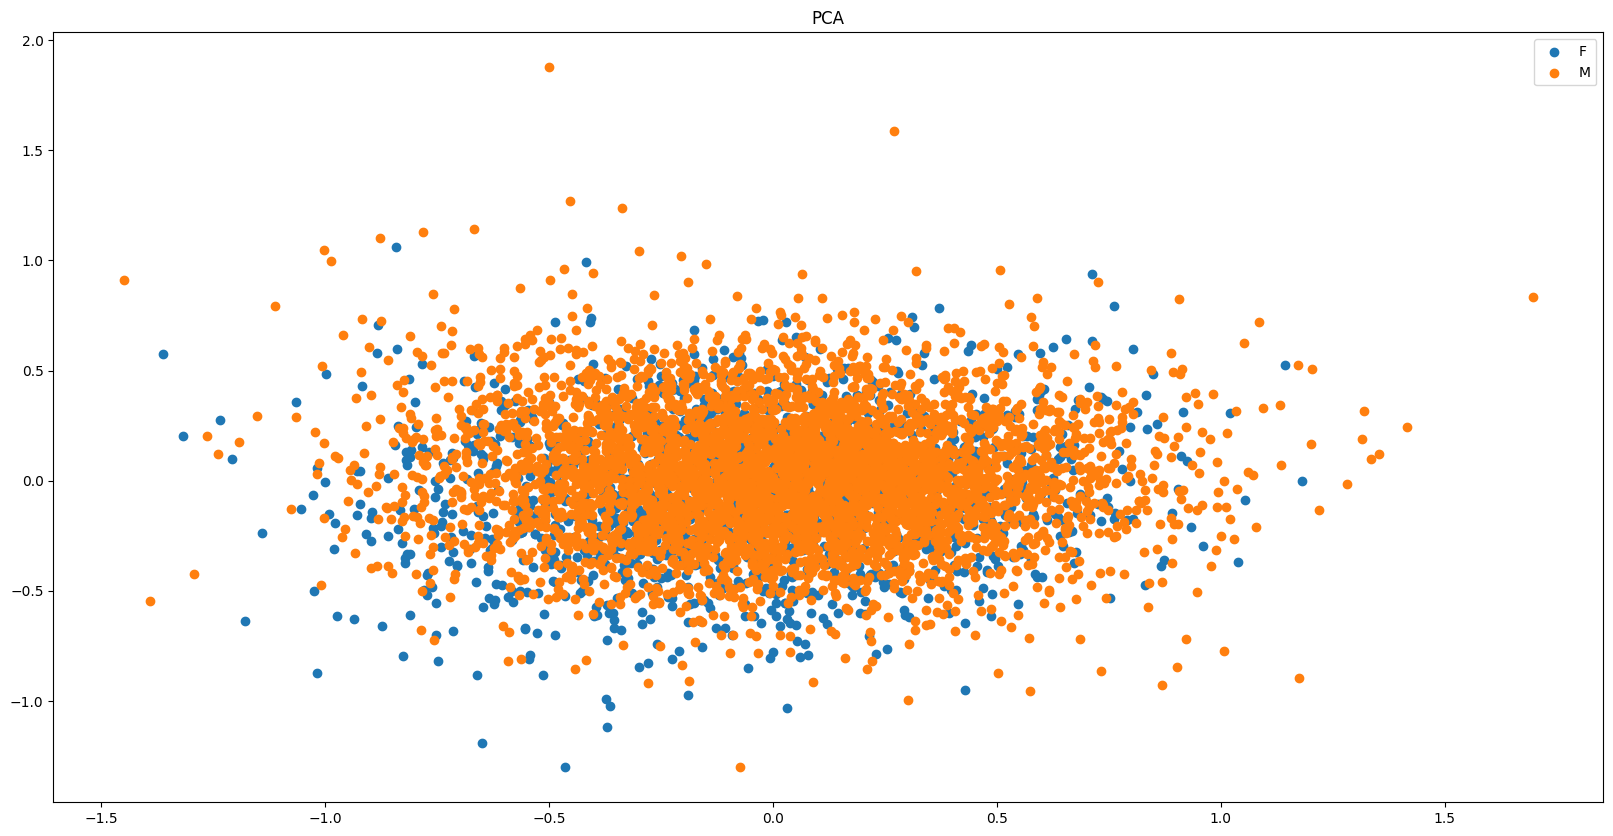

In [258]:
plot_results_users(pca_out,users_df,'Gender',dict_user_df,'PCA')

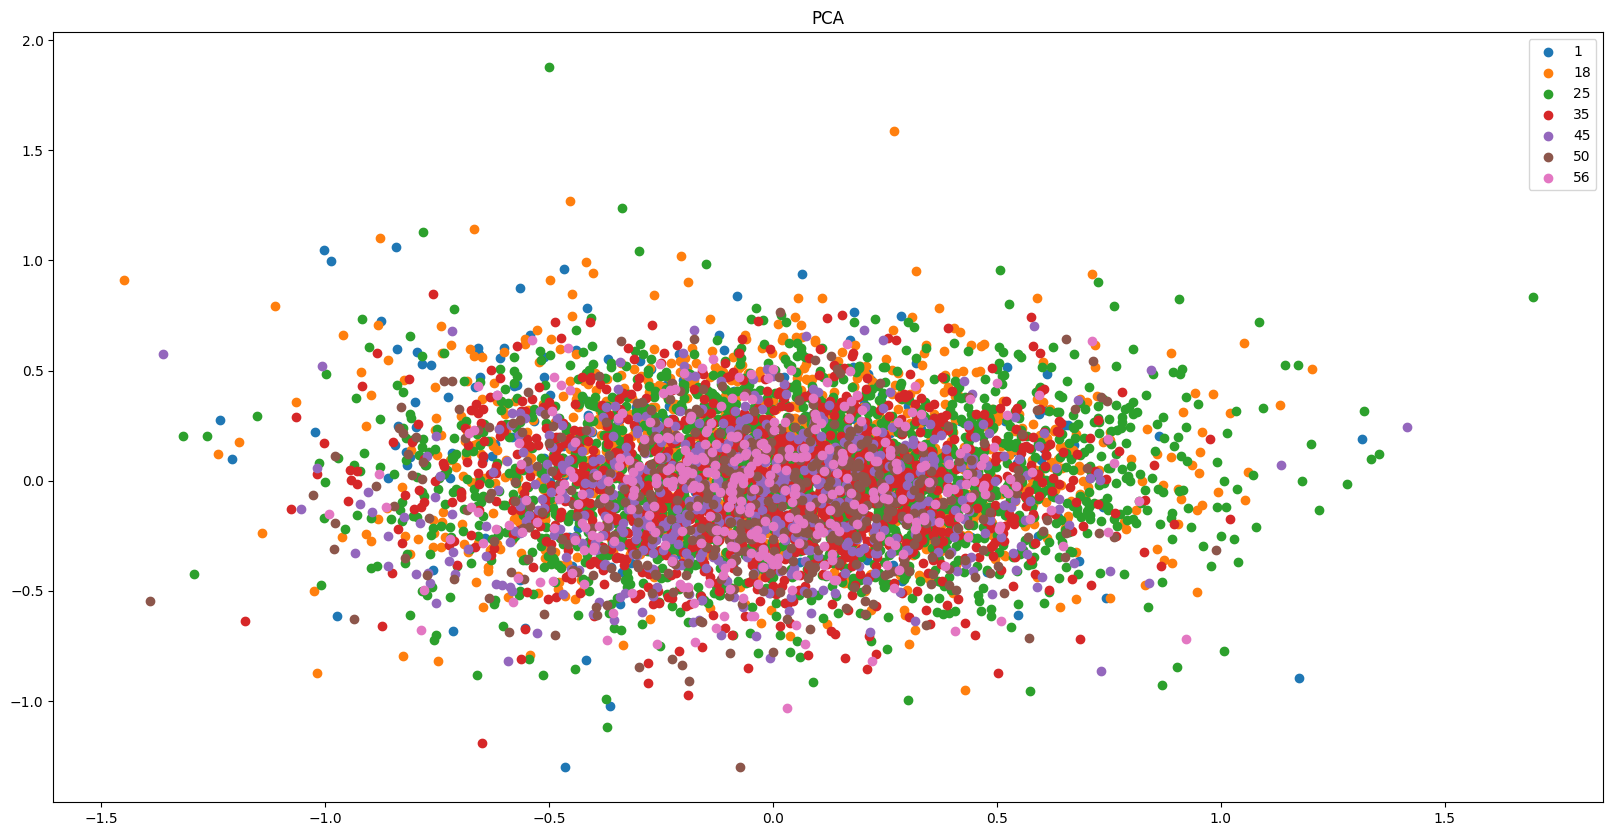

In [259]:
plot_results_users(pca_out,users_df,'Age',dict_user_df,'PCA')

## Umap

In [260]:
map = umap.UMAP(random_state = 42)
umap_out = map.fit_transform(user_matrix)

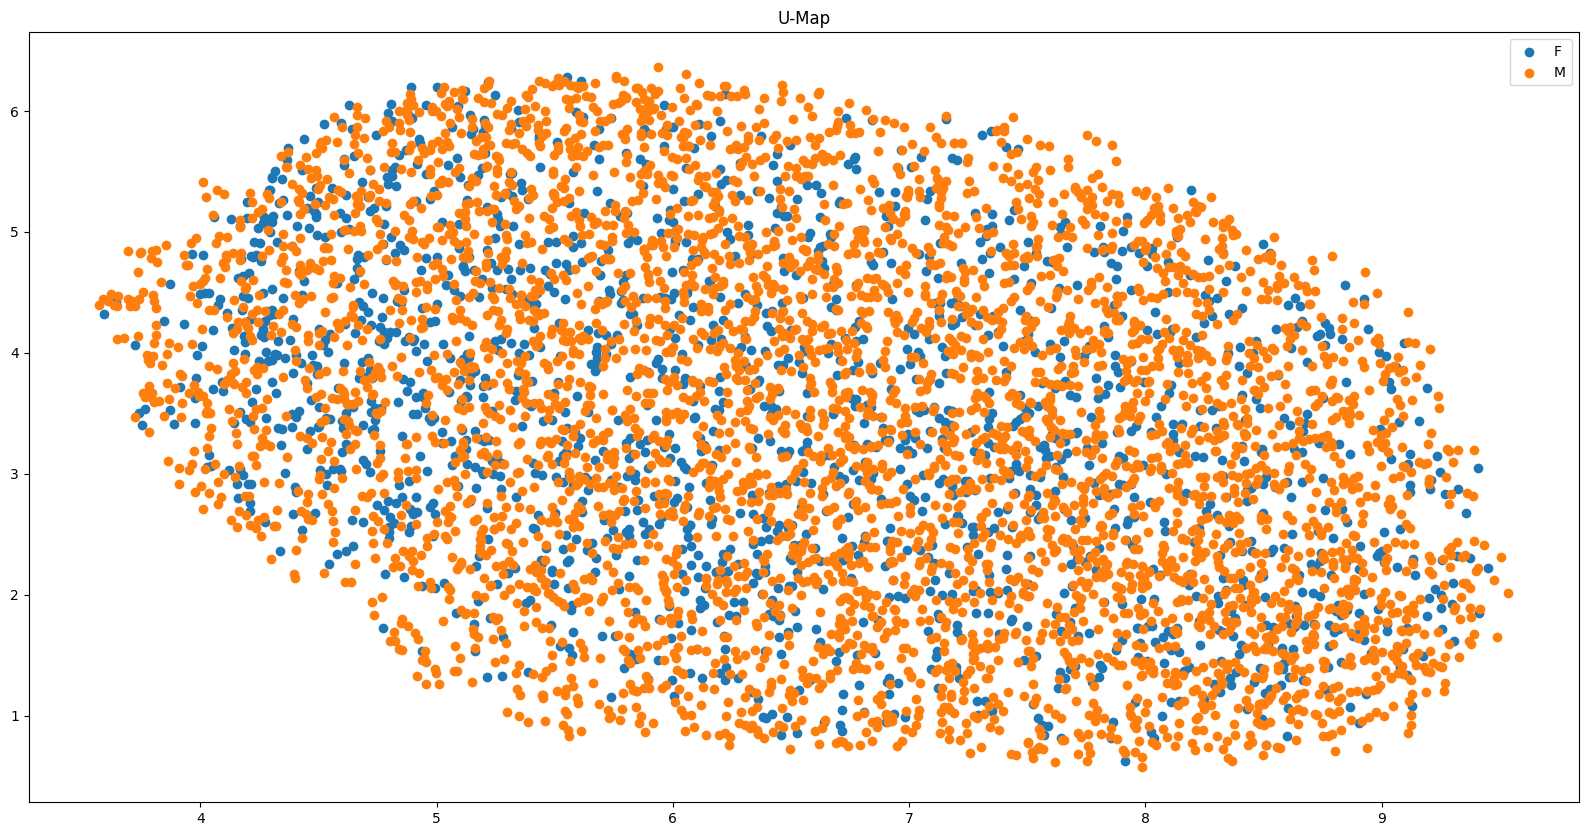

In [261]:
plot_results_users(umap_out,users_df,'Gender',dict_user_df,'U-Map')

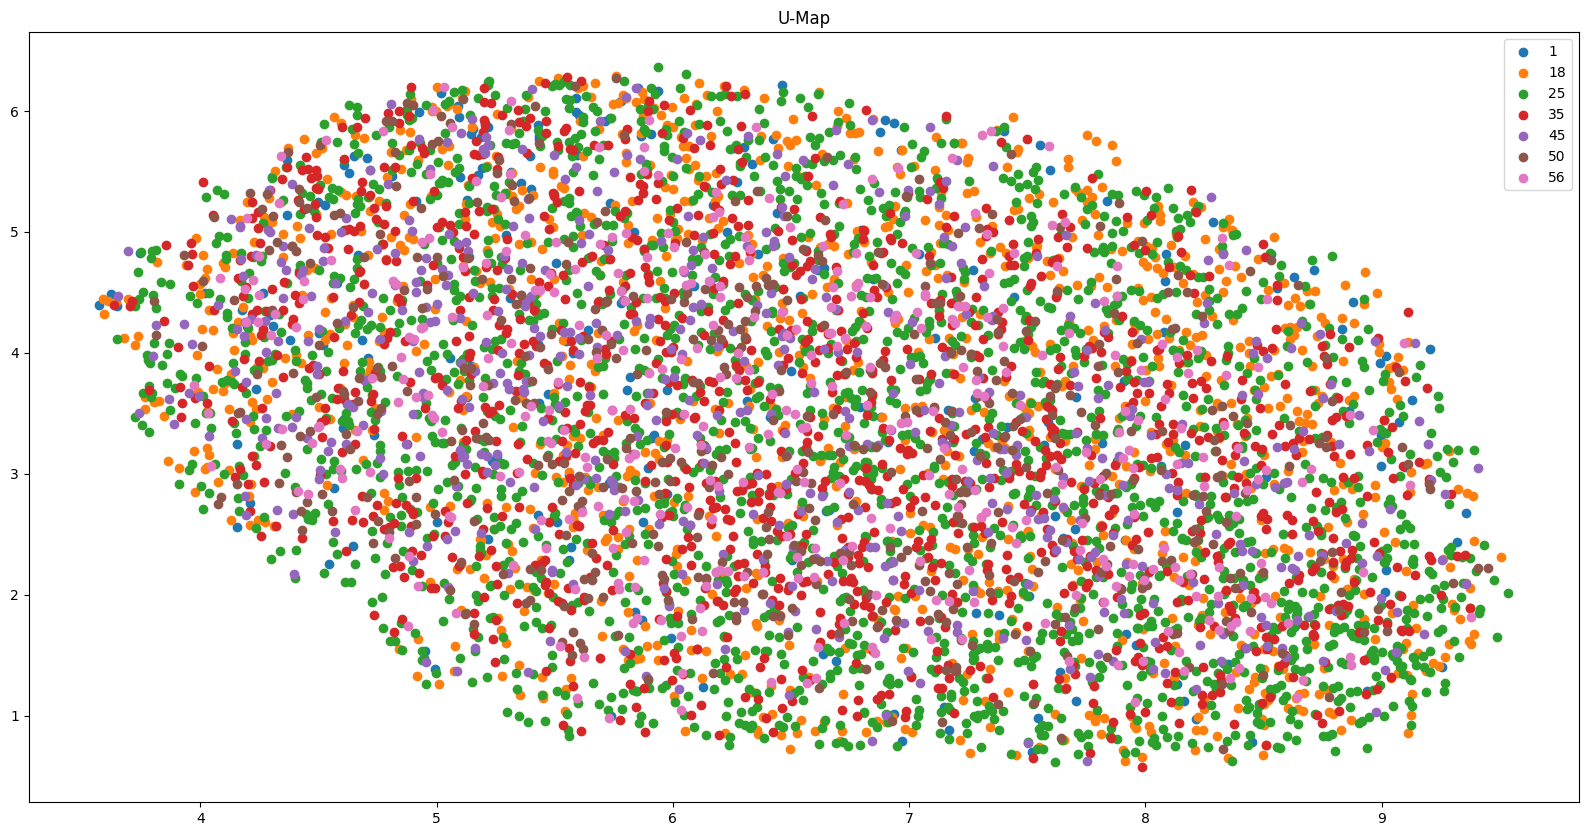

In [262]:
plot_results_users(umap_out,users_df,'Age',dict_user_df,'U-Map')

## TSNE

In [263]:
tsne = TSNE(random_state = 42)
tmp_tsne = tsne.fit_transform(user_matrix)

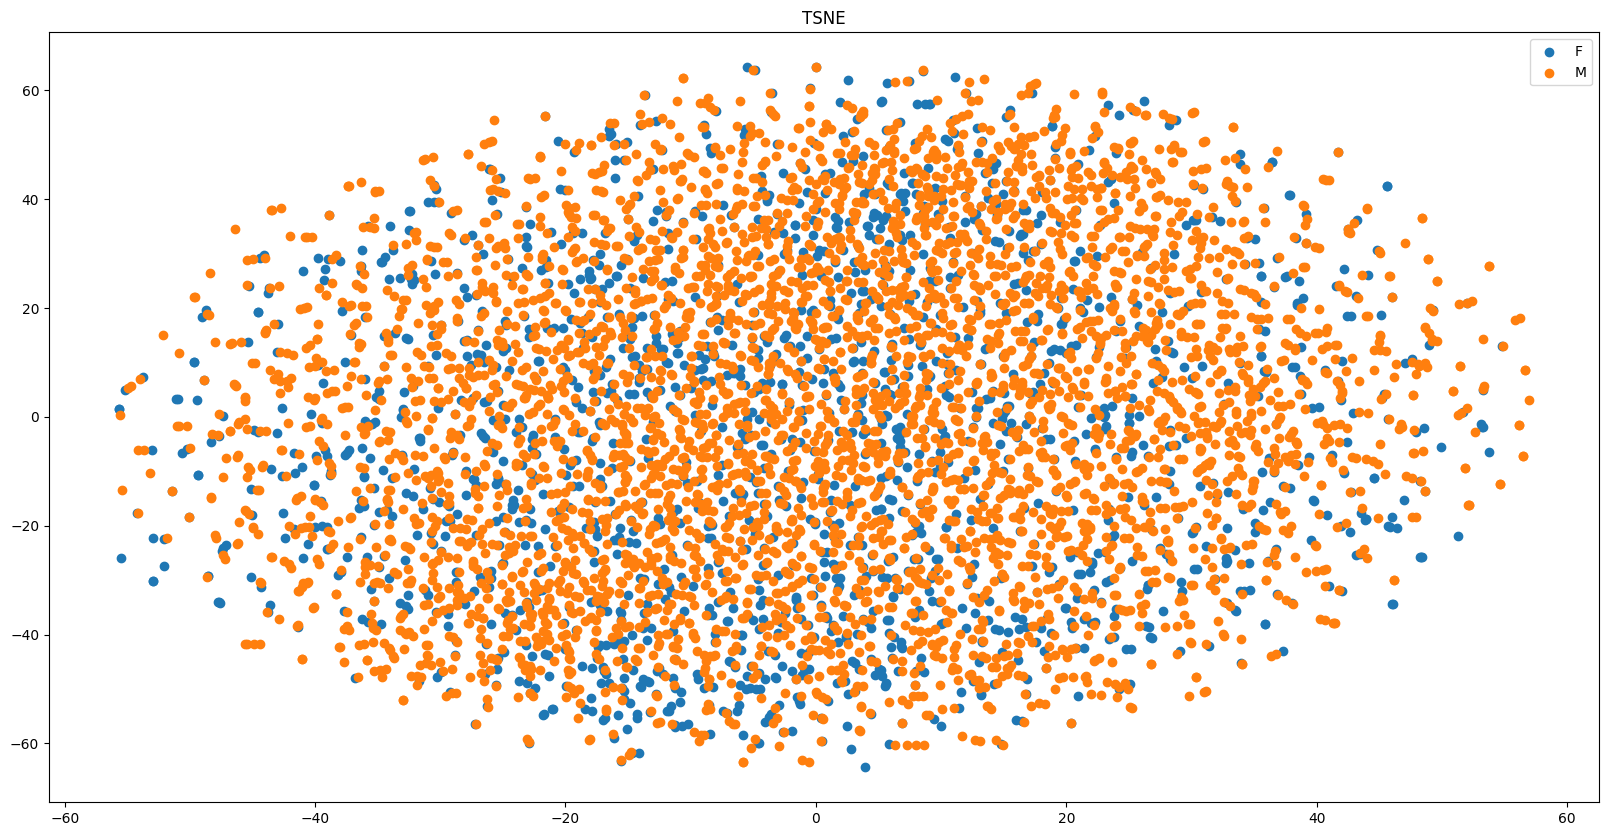

In [264]:
plot_results_users(tmp_tsne,users_df,'Gender',dict_user_df,'TSNE')

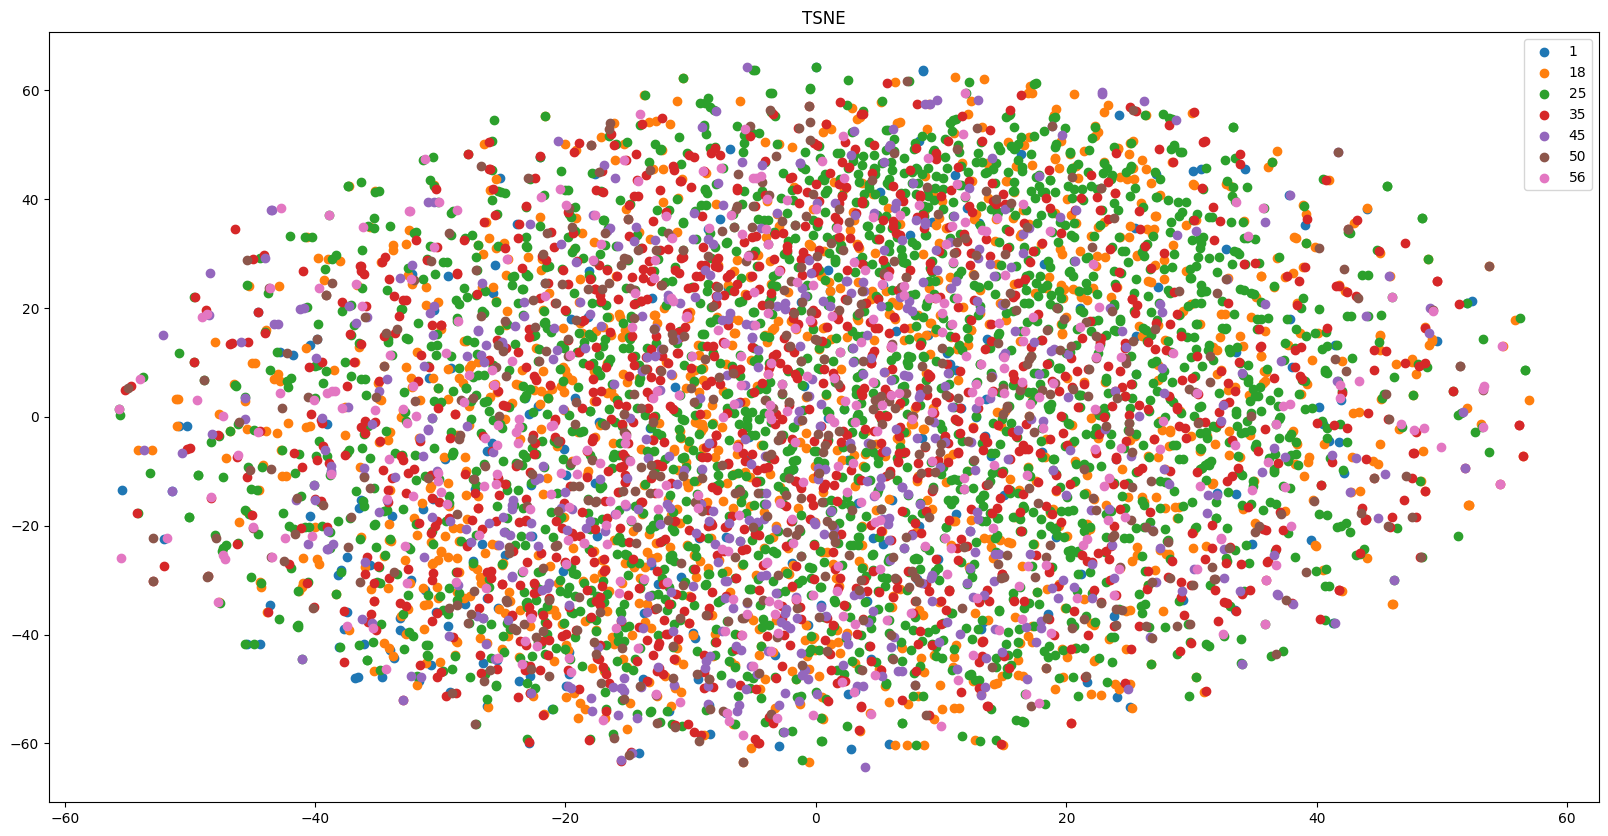

In [265]:
plot_results_users(tmp_tsne,users_df,'Age',dict_user_df,'TSNE')

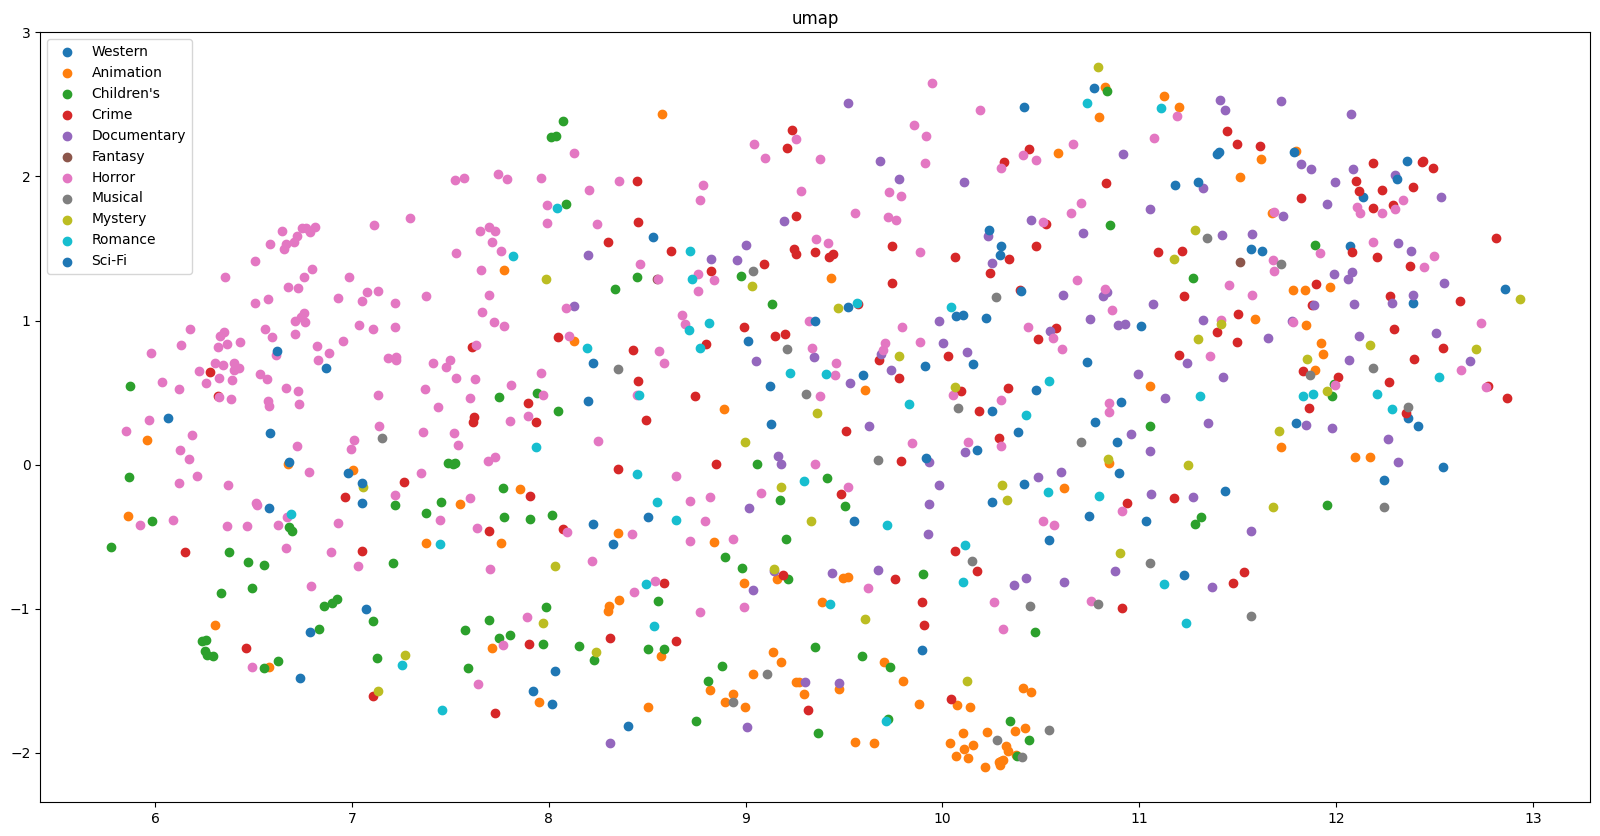

In [63]:
map = umap.UMAP(random_state = 42)
umap_out = map.fit_transform(item_matrix)
plot_results_movies(umap_out,movies_df,'genre_1',dict_movie_df,'umap')

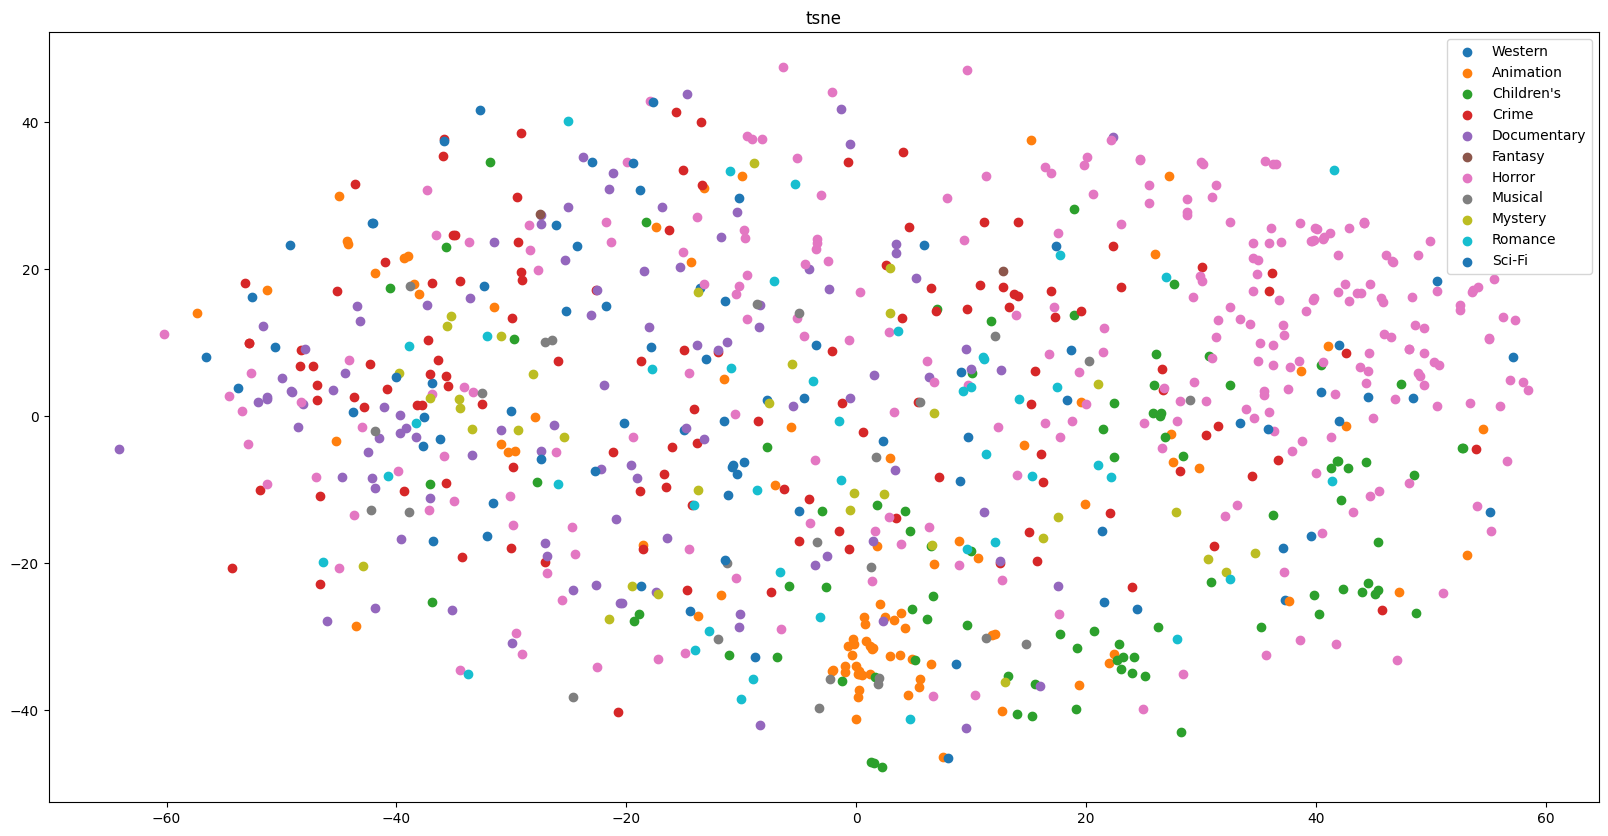

In [64]:
tsne = TSNE(random_state = 42)
tmp_tsne = tsne.fit_transform(item_matrix)
plot_results_movies(tmp_tsne,movies_df,'genre_1',dict_movie_df,'tsne')

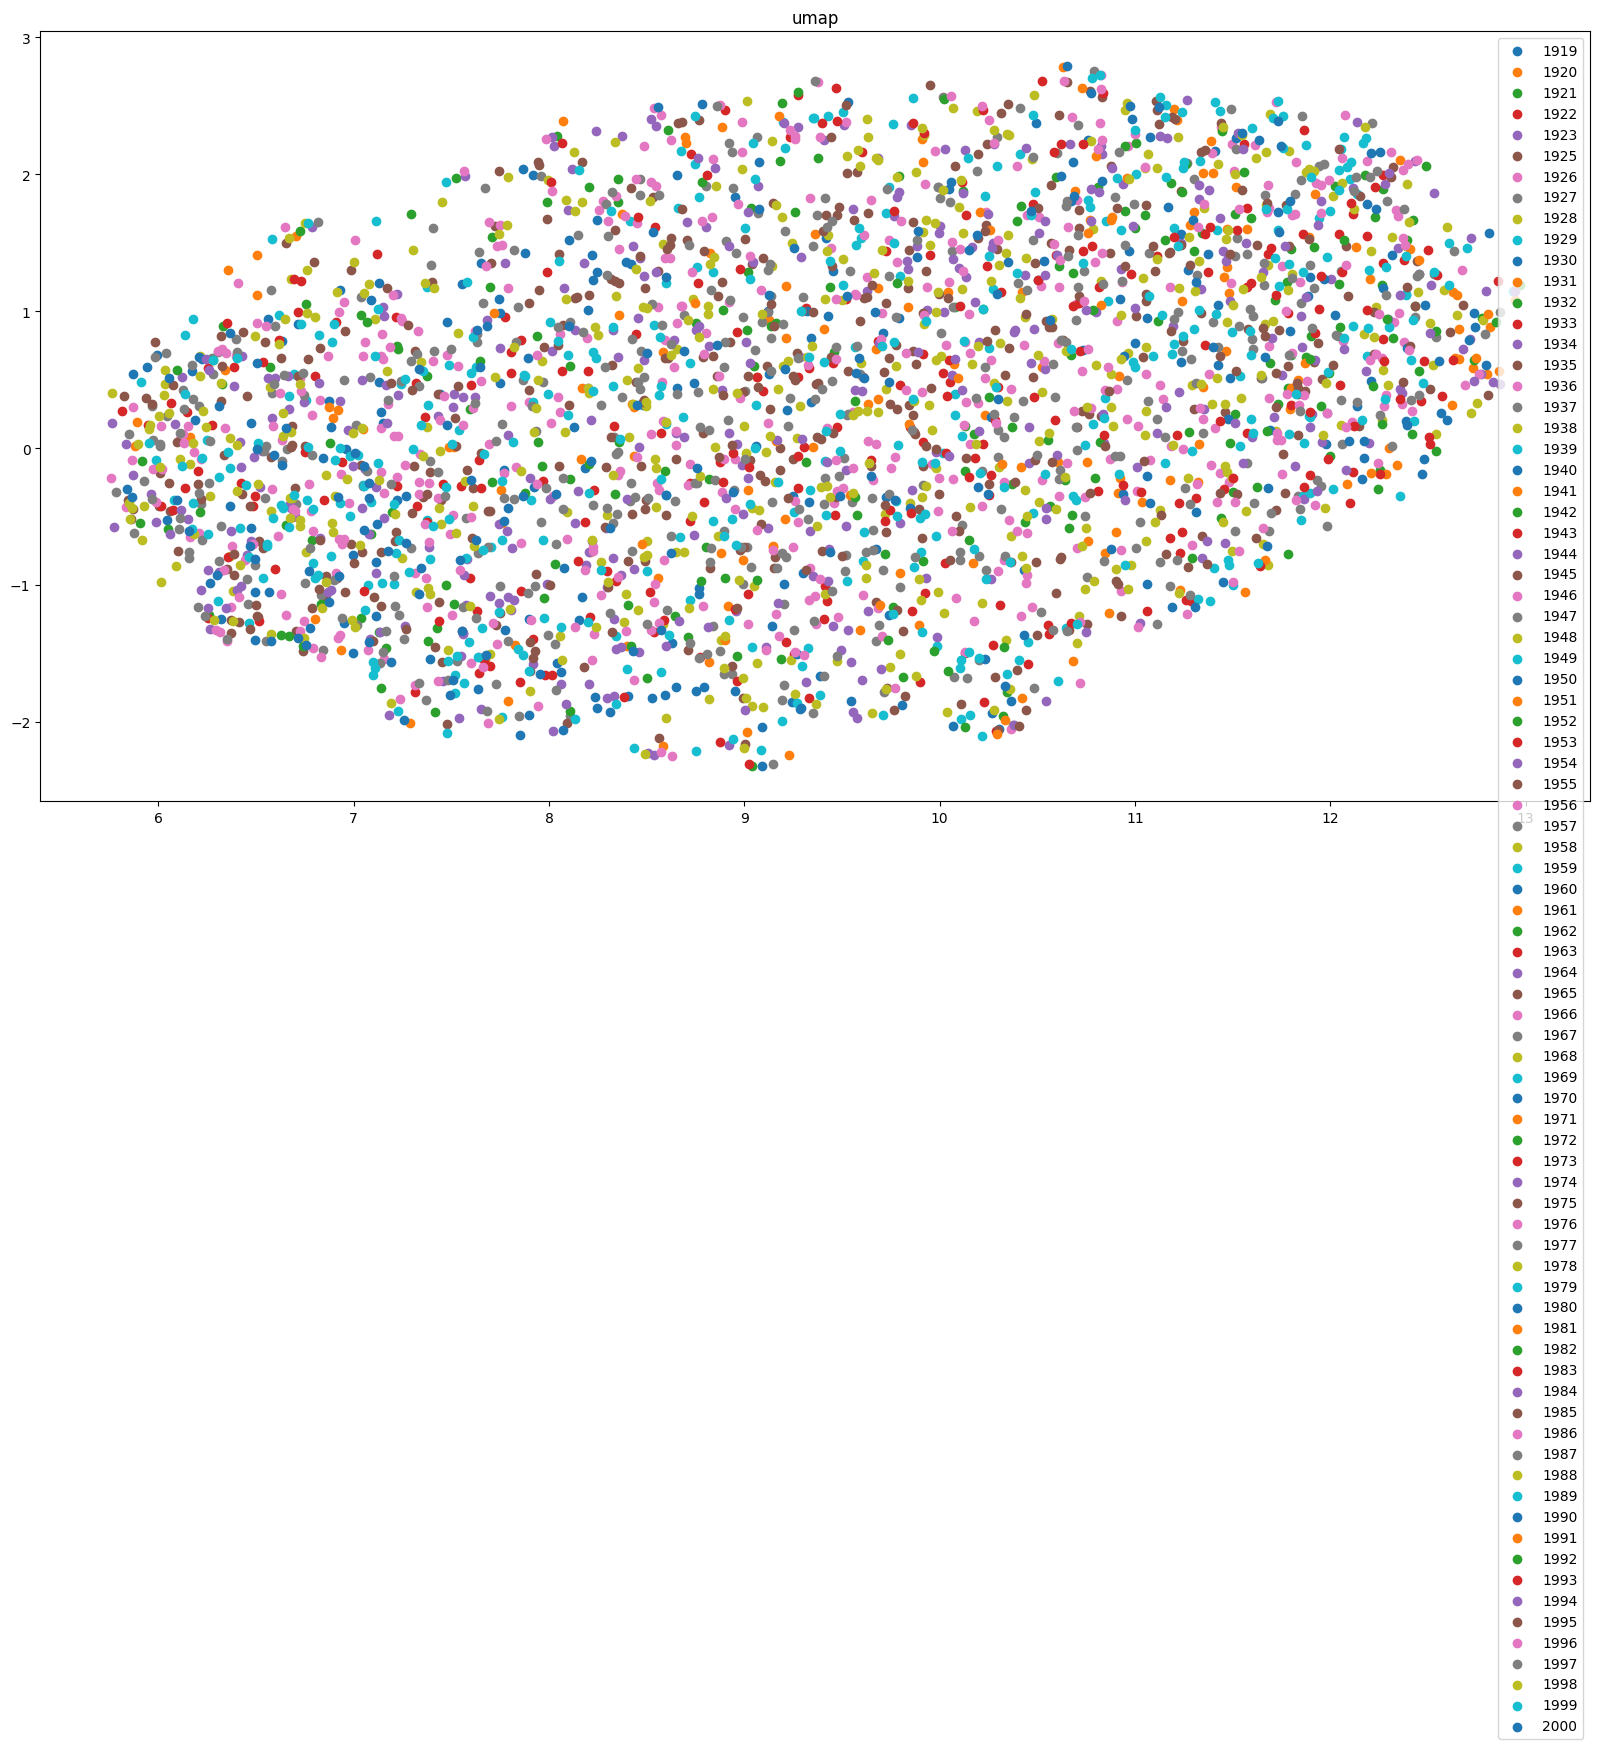

In [78]:
map = umap.UMAP(random_state = 42)
umap_out = map.fit_transform(item_matrix)
plot_results_movies(umap_out,movies_df,'year',dict_movie_df,'umap')

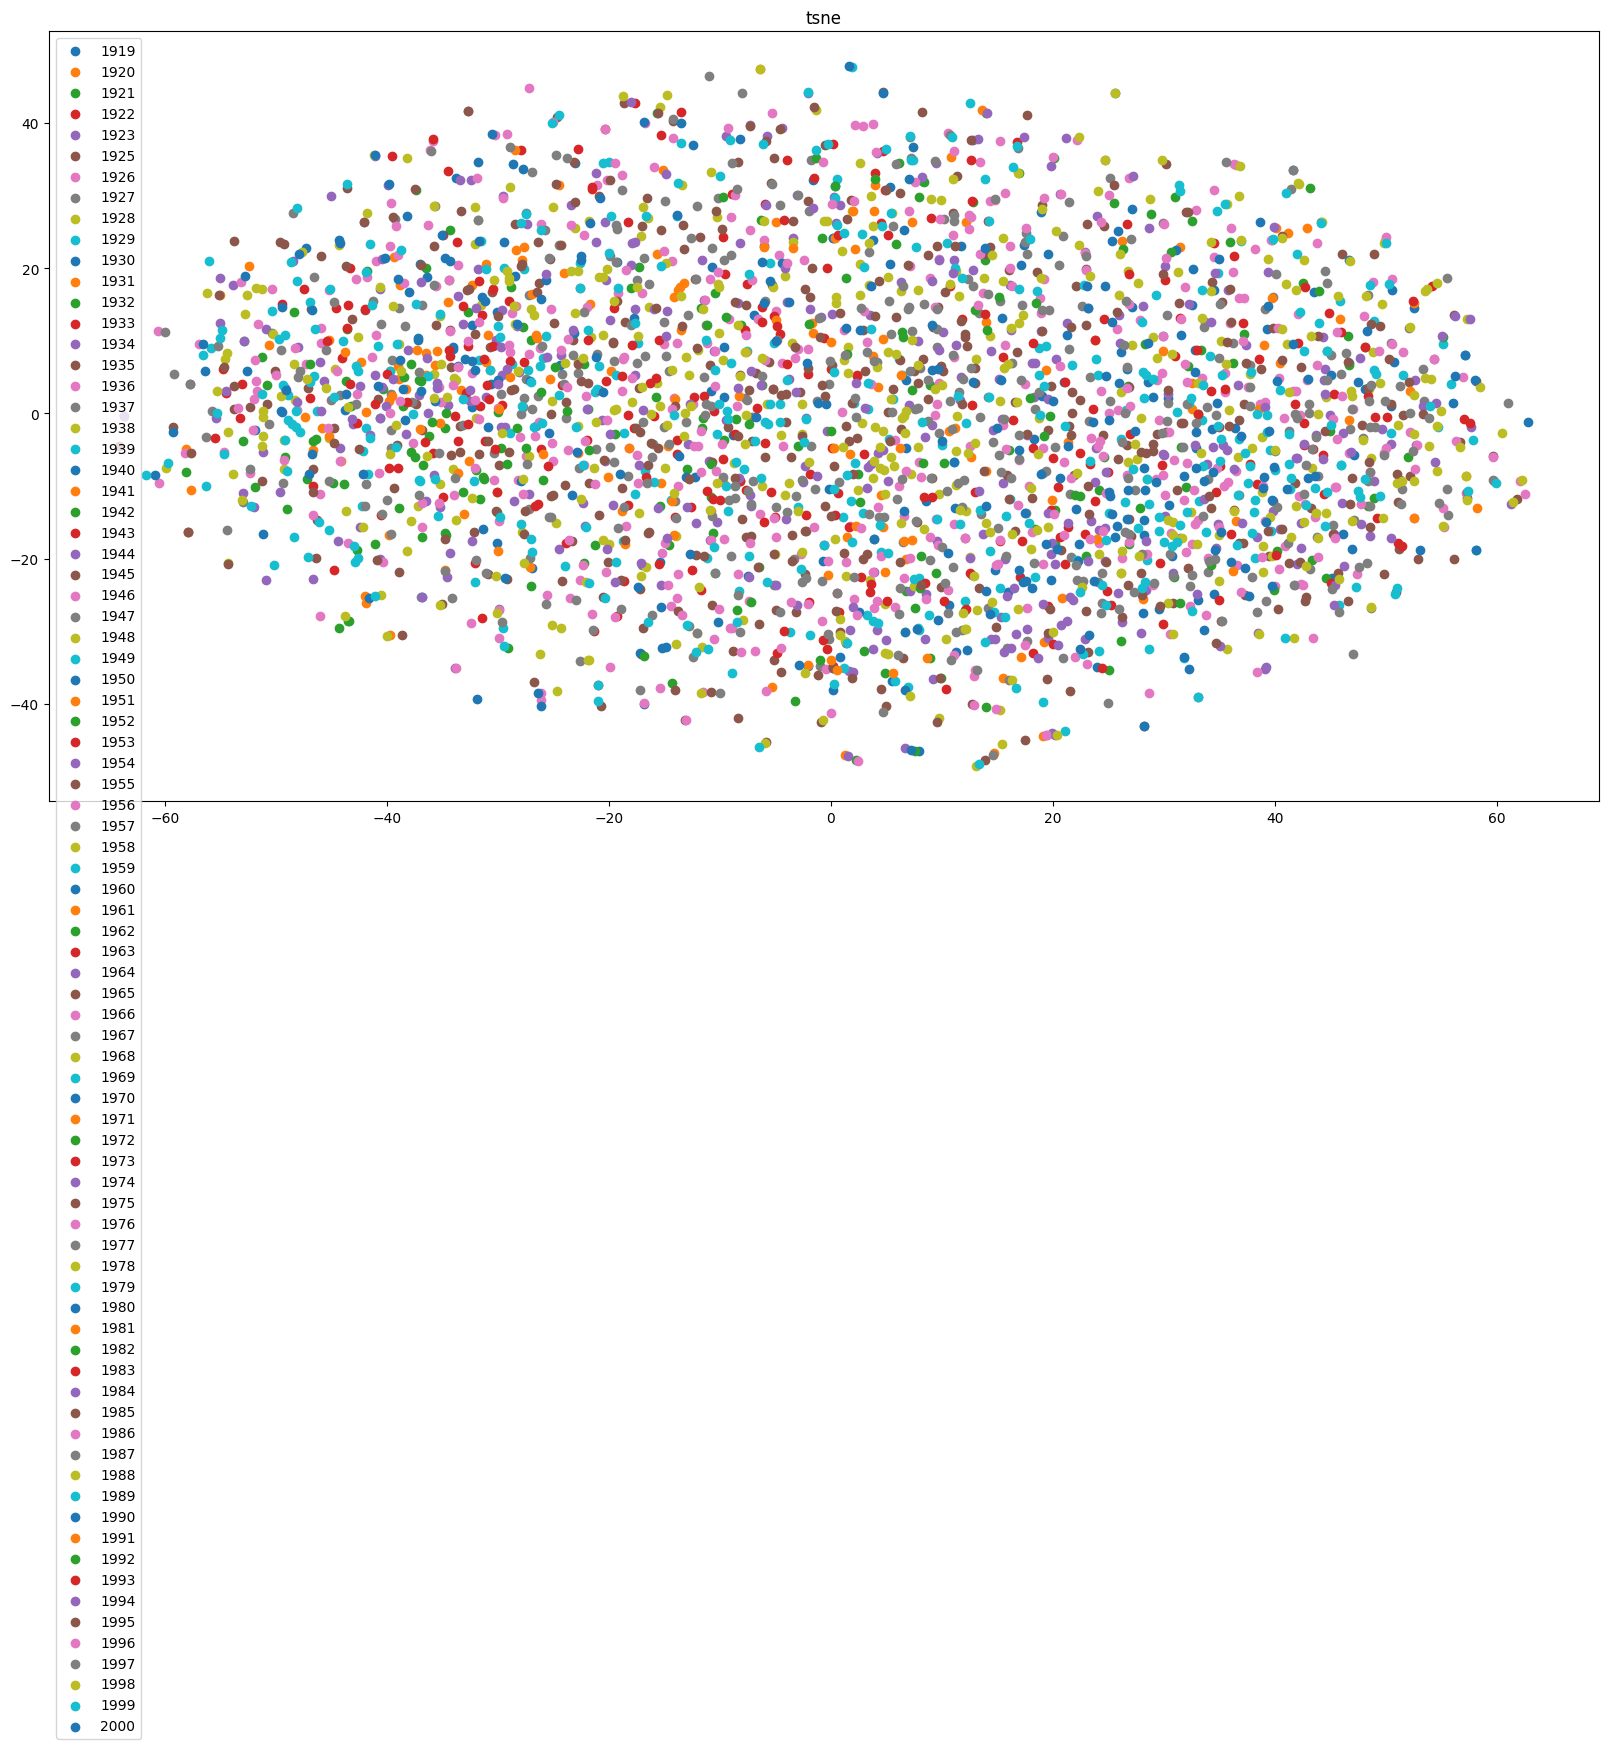

In [79]:
tsne = TSNE(random_state = 42)
tmp_tsne = tsne.fit_transform(item_matrix)
plot_results_movies(tmp_tsne,movies_df,'year',dict_movie_df,'tsne')